In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [9]:
calc = '../data/06_01 calculation_Char00.calc'

In [43]:
read_all = pd.read_csv(calc)
read_all.head()

,Zd: -0.4417 0.8972 0.0000
0,bones:\t59
1,01-X-x\t01-X-y\t01-X-z\t01-V-x\t01-V-y\t01-V-z...
2,0.0151\t-0.0393\t-0.0164\t-0.0013\t-0.0120\t0....
3,0.0151\t-0.0393\t-0.0164\t-0.0011\t-0.0115\t0....
4,0.0151\t-0.0394\t-0.0164\t-0.0002\t-0.0111\t0....


In [26]:
df = pd.read_csv(calc,header=2,sep='\t')
df.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,...,59-Q-x,59-Q-y,59-Q-z,59-A-x,59-A-y,59-A-z,59-W-x,59-W-y,59-W-z,Unnamed: 946
0,0.0151,-0.0393,-0.0164,-0.0013,-0.0120,0.0055,-0.1419,0.7258,-0.1401,-0.6584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0151,-0.0393,-0.0164,-0.0011,-0.0115,0.0056,-0.1419,0.7258,-0.1401,-0.6584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0151,-0.0394,-0.0164,-0.0002,-0.0111,0.0060,-0.1420,0.7256,-0.1402,-0.6585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0151,-0.0394,-0.0164,-0.0035,-0.0086,0.0057,-0.1420,0.7256,-0.1402,-0.6585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0151,-0.0395,-0.0164,-0.0024,-0.0085,0.0057,-0.1419,0.7257,-0.1401,-0.6585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [27]:
info = df.columns
info

Index(['01-X-x', '01-X-y', '01-X-z', '01-V-x', '01-V-y', '01-V-z', '01-Q-s',
       '01-Q-x', '01-Q-y', '01-Q-z',
       ...
       '59-Q-x', '59-Q-y', '59-Q-z', '59-A-x', '59-A-y', '59-A-z', '59-W-x',
       '59-W-y', '59-W-z', 'Unnamed: 946'],
      dtype='object', length=947)

In [28]:
df.shape

(61718, 947)

In [29]:
sum(df['Unnamed: 946'].isna())

61718

In [30]:
df.drop(columns='Unnamed: 946',inplace=True)

In [31]:
'''
X: World coordinate displacement: X（X、Y、Z）,unit is meter.
V: World coordinate displacement: V（X、Y、Z）,unit is meter per second.
Q: World coordinate module’s posture data: Q（W、X、Y、Z）.
A: Module coordinate accelerated speed: A（X、Y、Z），unit is g.
W: Module coordinate accelerated speed: M（X、Y、Z），unit is radian per second

01 Hips
02 RightUpLeg
03 RightLeg
04 RightFoot
05 LeftUpLeg
06 LeftLeg
07 LeftFoot
08 RightShoulder
09 RightArm
0A RightForeArm
0B RightHand
0C LeftShoulder
0D LeftArm
0E LeftForeArm
0F LeftHand
10 Head
11 Neck
12 Spine3
13 Spine2
14 Spine1
15 Spine
'''

'\nX: World coordinate displacement: X（X、Y、Z）,unit is meter.\nV: World coordinate displacement: V（X、Y、Z）,unit is meter per second.\nQ: World coordinate module’s posture data: Q（W、X、Y、Z）.\nA: Module coordinate accelerated speed: A（X、Y、Z），unit is g.\nW: Module coordinate accelerated speed: M（X、Y、Z），unit is radian per second\n\n01 Hips\n02 RightUpLeg\n03 RightLeg\n04 RightFoot\n05 LeftUpLeg\n06 LeftLeg\n07 LeftFoot\n08 RightShoulder\n09 RightArm\n0A RightForeArm\n0B RightHand\n0C LeftShoulder\n0D LeftArm\n0E LeftForeArm\n0F LeftHand\n10 Head\n11 Neck\n12 Spine3\n13 Spine2\n14 Spine1\n15 Spine\n'

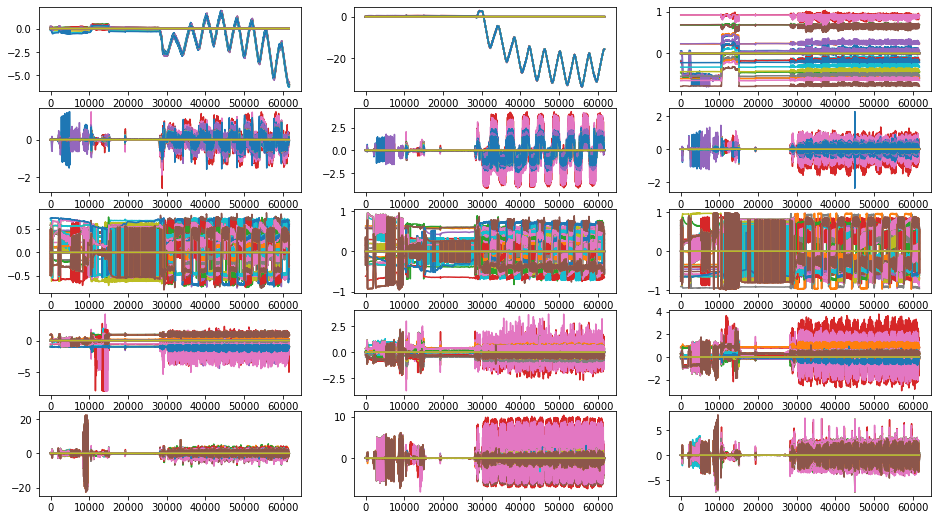

In [32]:
fig, ax = plt.subplots(5,3,figsize=(16,9))
for joint in range(1,60):
    if joint < 10:
        text = '0' + str(joint)
    else:
        text = str(joint)
    ax[0,0].plot(df[text +'-X-x'])    
    ax[0,1].plot(df[text +'-X-y'])
    ax[0,2].plot(df[text +'-X-z'])
    ax[1,0].plot(df[text +'-V-x'])
    ax[1,1].plot(df[text +'-V-y'])
    ax[1,2].plot(df[text +'-V-z'])
    ax[2,0].plot(df[text +'-Q-x'])
    ax[2,1].plot(df[text +'-Q-y'])
    ax[2,2].plot(df[text +'-Q-z'])
    ax[3,0].plot(df[text +'-A-x'])
    ax[3,1].plot(df[text +'-A-y'])
    ax[3,2].plot(df[text +'-A-z'])
    ax[4,0].plot(df[text +'-W-x'])
    ax[4,1].plot(df[text +'-W-y'])
    ax[4,2].plot(df[text +'-W-z'])

In [33]:
#06_1_Char00.bvh	norma
#30120	32045
#34437	36508
#38509	40470
#41688	52101
#53251	59057
#59815	61580
data = df.copy()

In [34]:
df = data.loc[30120:32045,:]
df.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,...,59-Q-s,59-Q-x,59-Q-y,59-Q-z,59-A-x,59-A-y,59-A-z,59-W-x,59-W-y,59-W-z
30120,-2.7252,2.7311,-0.0139,-0.0788,-0.0468,0.0130,0.6567,0.1911,0.7037,-0.1926,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30121,-2.7260,2.7307,-0.0139,-0.0858,-0.0526,0.0134,0.6569,0.1911,0.7035,-0.1926,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30122,-2.7268,2.7302,-0.0138,-0.0875,-0.0560,0.0142,0.6570,0.1910,0.7034,-0.1927,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30123,-2.7276,2.7297,-0.0138,-0.0926,-0.0574,0.0148,0.6571,0.1911,0.7032,-0.1928,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30124,-2.7285,2.7292,-0.0137,-0.0971,-0.0599,0.0155,0.6572,0.1912,0.7030,-0.1930,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


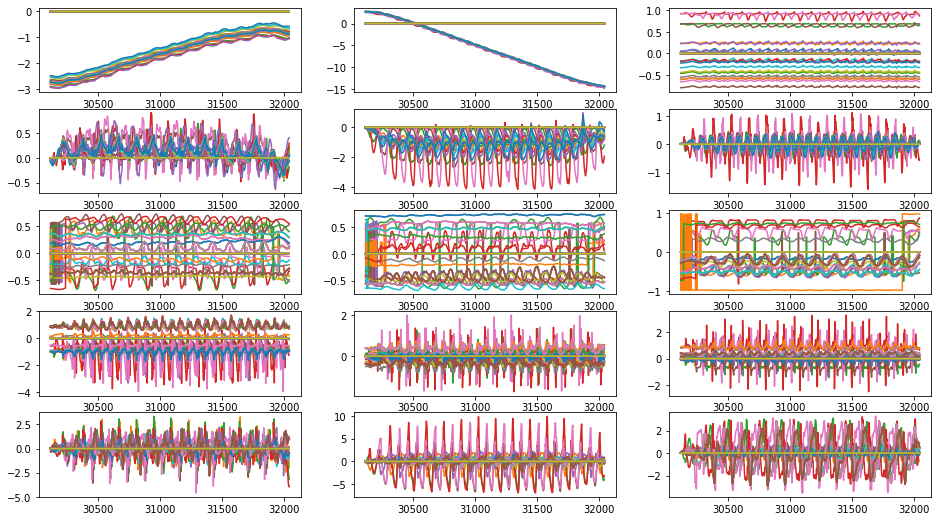

In [35]:
fig, ax = plt.subplots(5,3,figsize=(16,9))
for joint in range(1,60):
    if joint < 10:
        text = '0' + str(joint)
    else:
        text = str(joint)
    ax[0,0].plot(df[text +'-X-x'])    
    ax[0,1].plot(df[text +'-X-y'])
    ax[0,2].plot(df[text +'-X-z'])
    ax[1,0].plot(df[text +'-V-x'])
    ax[1,1].plot(df[text +'-V-y'])
    ax[1,2].plot(df[text +'-V-z'])
    ax[2,0].plot(df[text +'-Q-x'])
    ax[2,1].plot(df[text +'-Q-y'])
    ax[2,2].plot(df[text +'-Q-z'])
    ax[3,0].plot(df[text +'-A-x'])
    ax[3,1].plot(df[text +'-A-y'])
    ax[3,2].plot(df[text +'-A-z'])
    ax[4,0].plot(df[text +'-W-x'])
    ax[4,1].plot(df[text +'-W-y'])
    ax[4,2].plot(df[text +'-W-z'])

In [36]:
df = data.loc[34437:36508,:]

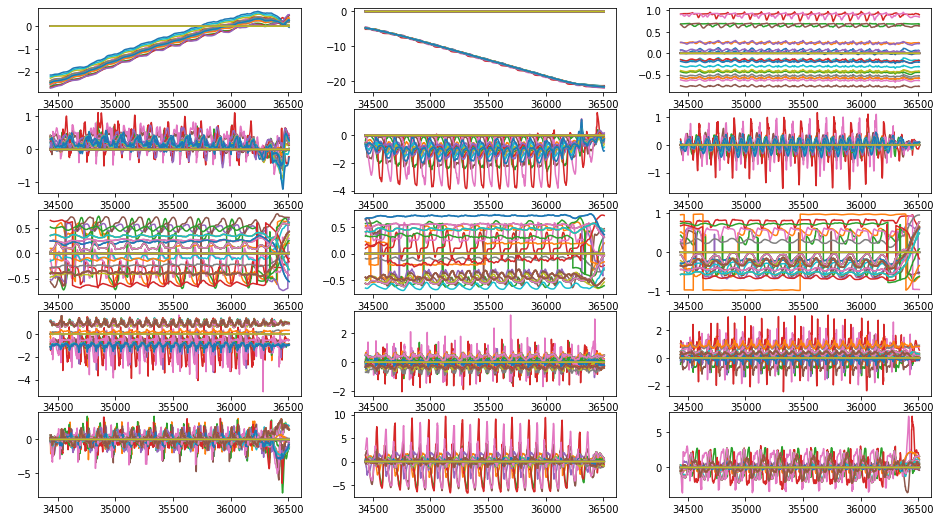

In [37]:
fig, ax = plt.subplots(5,3,figsize=(16,9))
for joint in range(1,60):
    if joint < 10:
        text = '0' + str(joint)
    else:
        text = str(joint)
    ax[0,0].plot(df[text +'-X-x'])    
    ax[0,1].plot(df[text +'-X-y'])
    ax[0,2].plot(df[text +'-X-z'])
    ax[1,0].plot(df[text +'-V-x'])
    ax[1,1].plot(df[text +'-V-y'])
    ax[1,2].plot(df[text +'-V-z'])
    ax[2,0].plot(df[text +'-Q-x'])
    ax[2,1].plot(df[text +'-Q-y'])
    ax[2,2].plot(df[text +'-Q-z'])
    ax[3,0].plot(df[text +'-A-x'])
    ax[3,1].plot(df[text +'-A-y'])
    ax[3,2].plot(df[text +'-A-z'])
    ax[4,0].plot(df[text +'-W-x'])
    ax[4,1].plot(df[text +'-W-y'])
    ax[4,2].plot(df[text +'-W-z'])

In [38]:
df = data.loc[38509:40470,:]

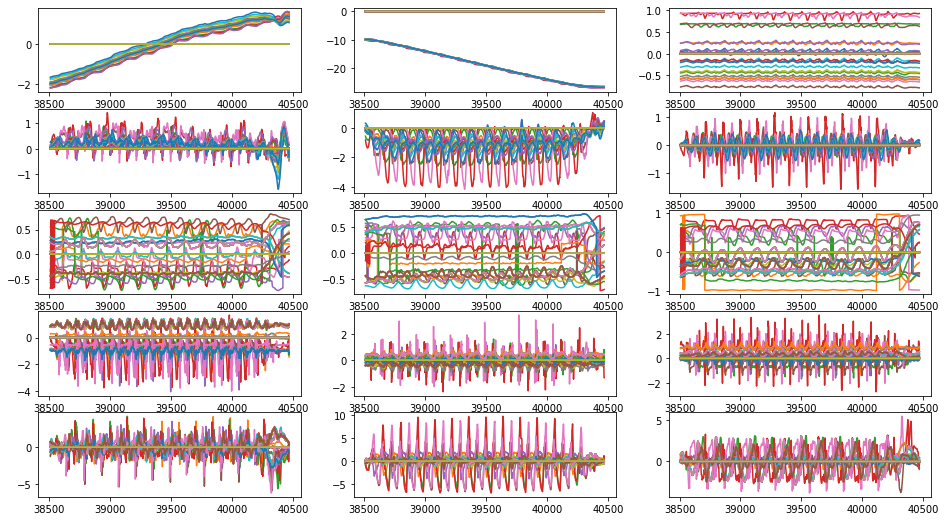

In [39]:
fig, ax = plt.subplots(5,3,figsize=(16,9))
for joint in range(1,60):
    if joint < 10:
        text = '0' + str(joint)
    else:
        text = str(joint)
    ax[0,0].plot(df[text +'-X-x'])    
    ax[0,1].plot(df[text +'-X-y'])
    ax[0,2].plot(df[text +'-X-z'])
    ax[1,0].plot(df[text +'-V-x'])
    ax[1,1].plot(df[text +'-V-y'])
    ax[1,2].plot(df[text +'-V-z'])
    ax[2,0].plot(df[text +'-Q-x'])
    ax[2,1].plot(df[text +'-Q-y'])
    ax[2,2].plot(df[text +'-Q-z'])
    ax[3,0].plot(df[text +'-A-x'])
    ax[3,1].plot(df[text +'-A-y'])
    ax[3,2].plot(df[text +'-A-z'])
    ax[4,0].plot(df[text +'-W-x'])
    ax[4,1].plot(df[text +'-W-y'])
    ax[4,2].plot(df[text +'-W-z'])

In [40]:
df = data.loc[41688:52101,:]

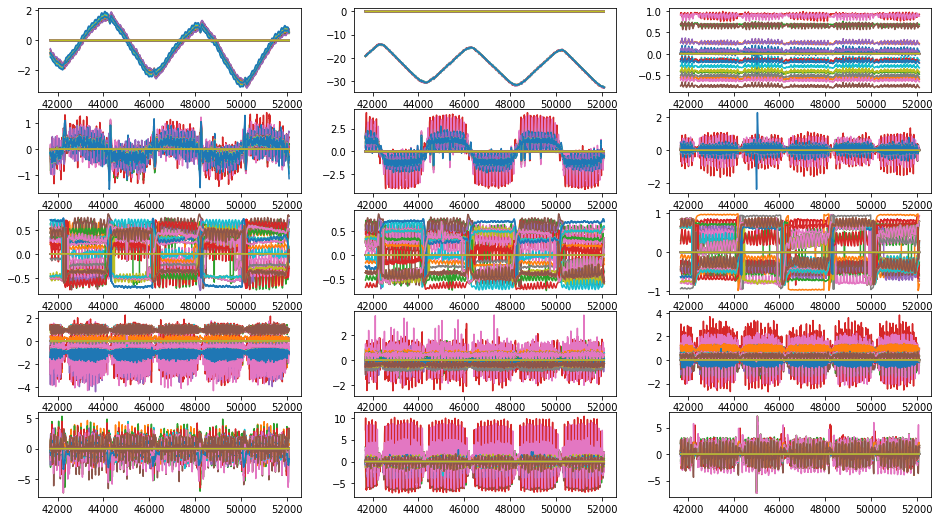

In [41]:
fig, ax = plt.subplots(5,3,figsize=(16,9))
for joint in range(1,60):
    if joint < 10:
        text = '0' + str(joint)
    else:
        text = str(joint)
    ax[0,0].plot(df[text +'-X-x'])    
    ax[0,1].plot(df[text +'-X-y'])
    ax[0,2].plot(df[text +'-X-z'])
    ax[1,0].plot(df[text +'-V-x'])
    ax[1,1].plot(df[text +'-V-y'])
    ax[1,2].plot(df[text +'-V-z'])
    ax[2,0].plot(df[text +'-Q-x'])
    ax[2,1].plot(df[text +'-Q-y'])
    ax[2,2].plot(df[text +'-Q-z'])
    ax[3,0].plot(df[text +'-A-x'])
    ax[3,1].plot(df[text +'-A-y'])
    ax[3,2].plot(df[text +'-A-z'])
    ax[4,0].plot(df[text +'-W-x'])
    ax[4,1].plot(df[text +'-W-y'])
    ax[4,2].plot(df[text +'-W-z'])